In [40]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # High-level interface
import plotly.graph_objects as go  # Low-level interface

In [41]:
#Load the dataset
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [42]:
#Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
#Summary statistics using describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
#Median of numeric columns
df.median(numeric_only=True)

,0
PassengerId,446.0000
Survived,0.0000
Pclass,3.0000
Age,28.0000
SibSp,0.0000
Parch,0.0000
Fare,14.4542


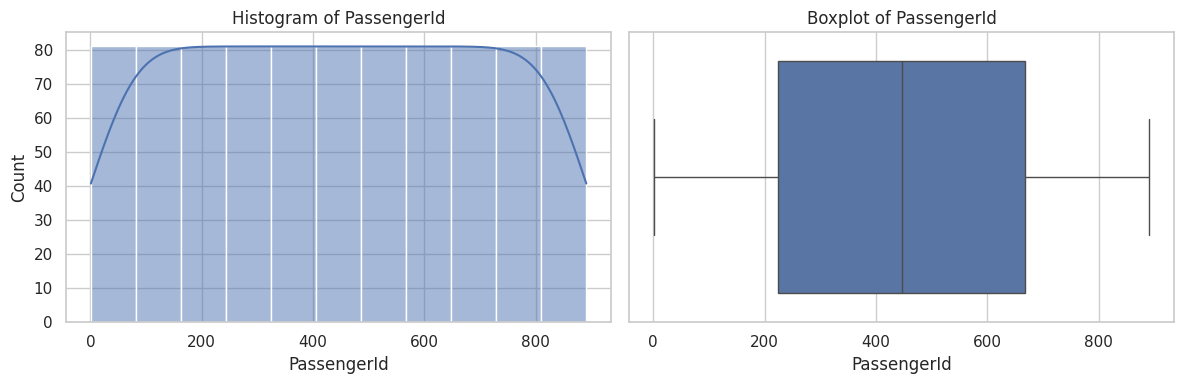

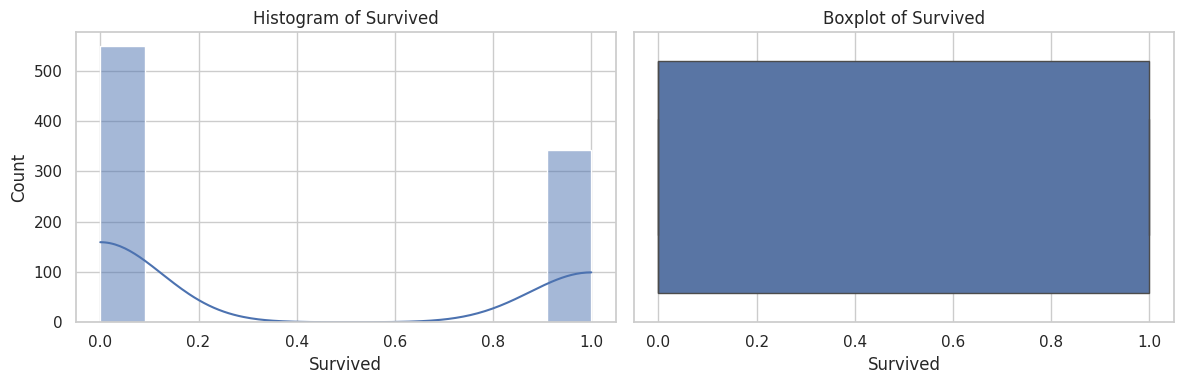

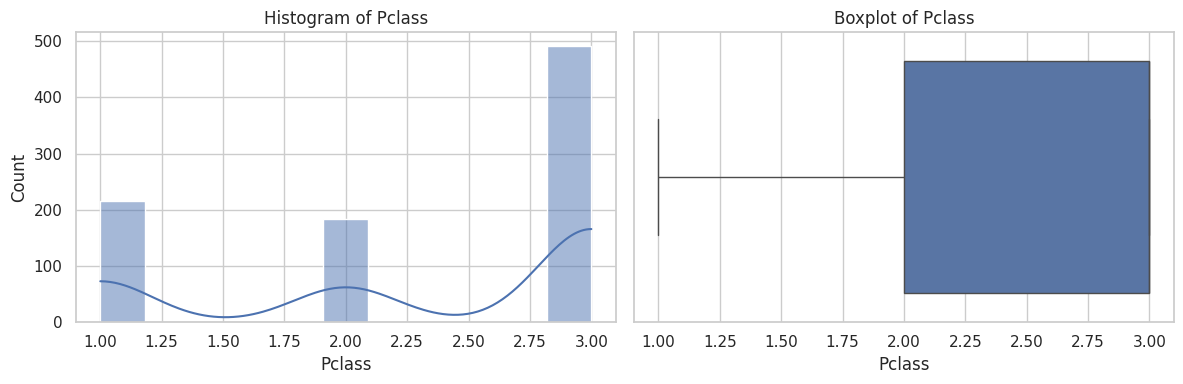

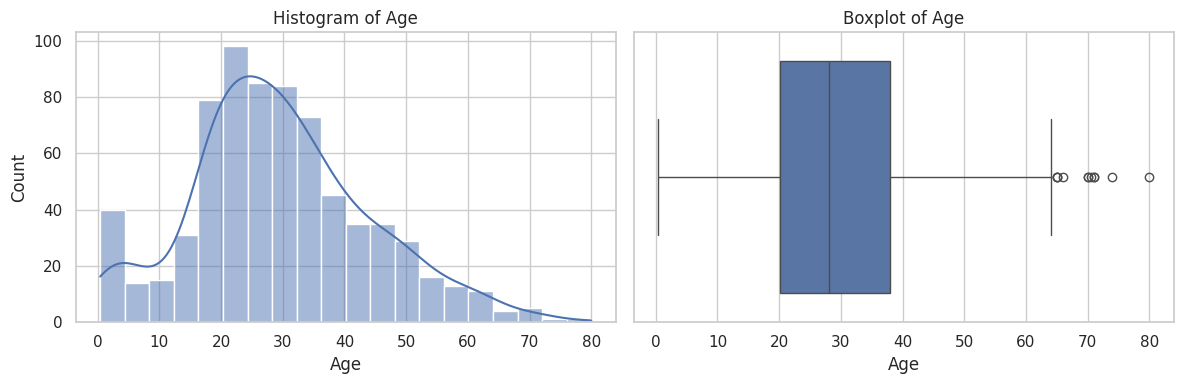

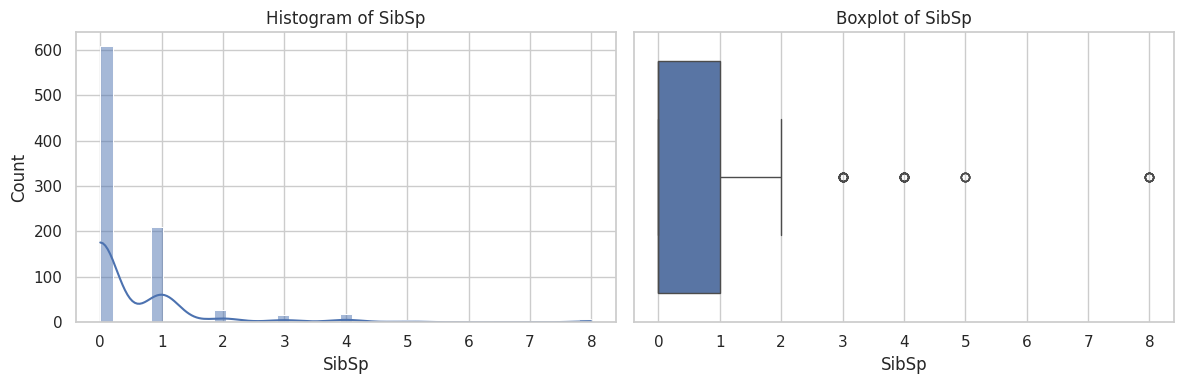

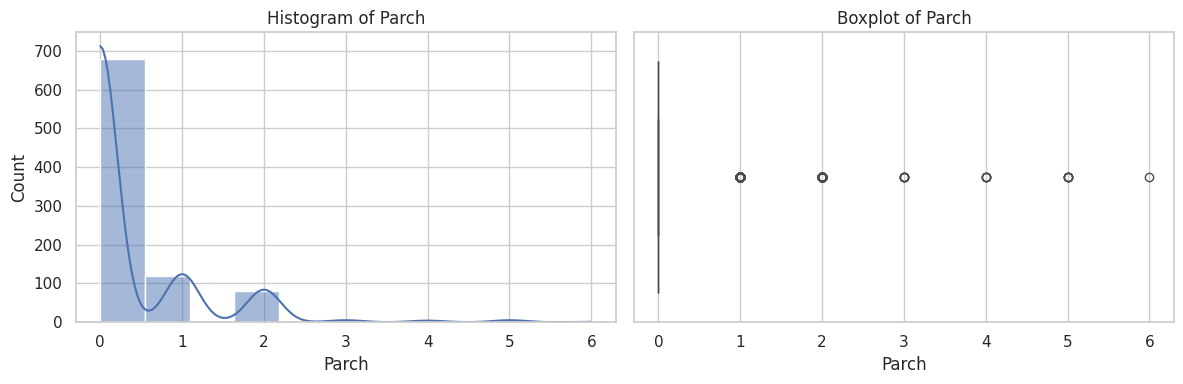

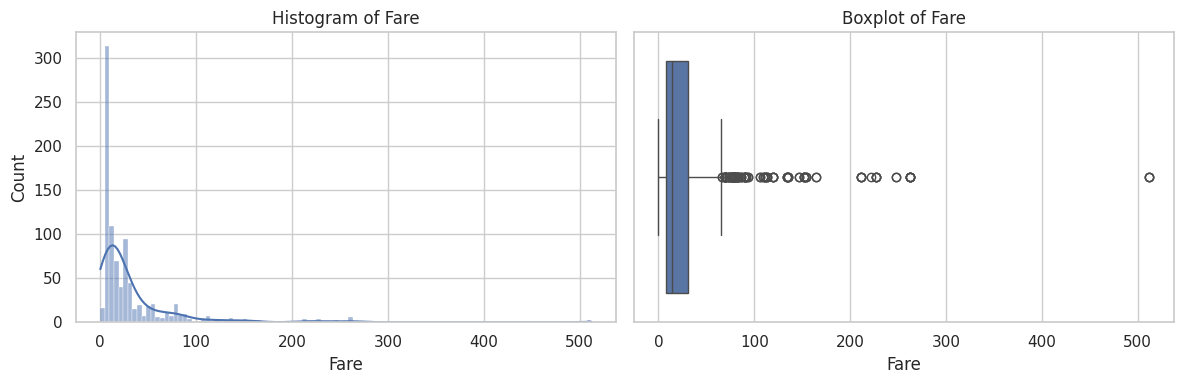

In [46]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [48]:
#Histogram & Box-plot using plotly
for col in numeric_cols:
    px.histogram(df, x=col, nbins=30, title=f"Histogram of {col}").show()
    px.box(df, y=col, title=f"Boxplot of {col}").show()

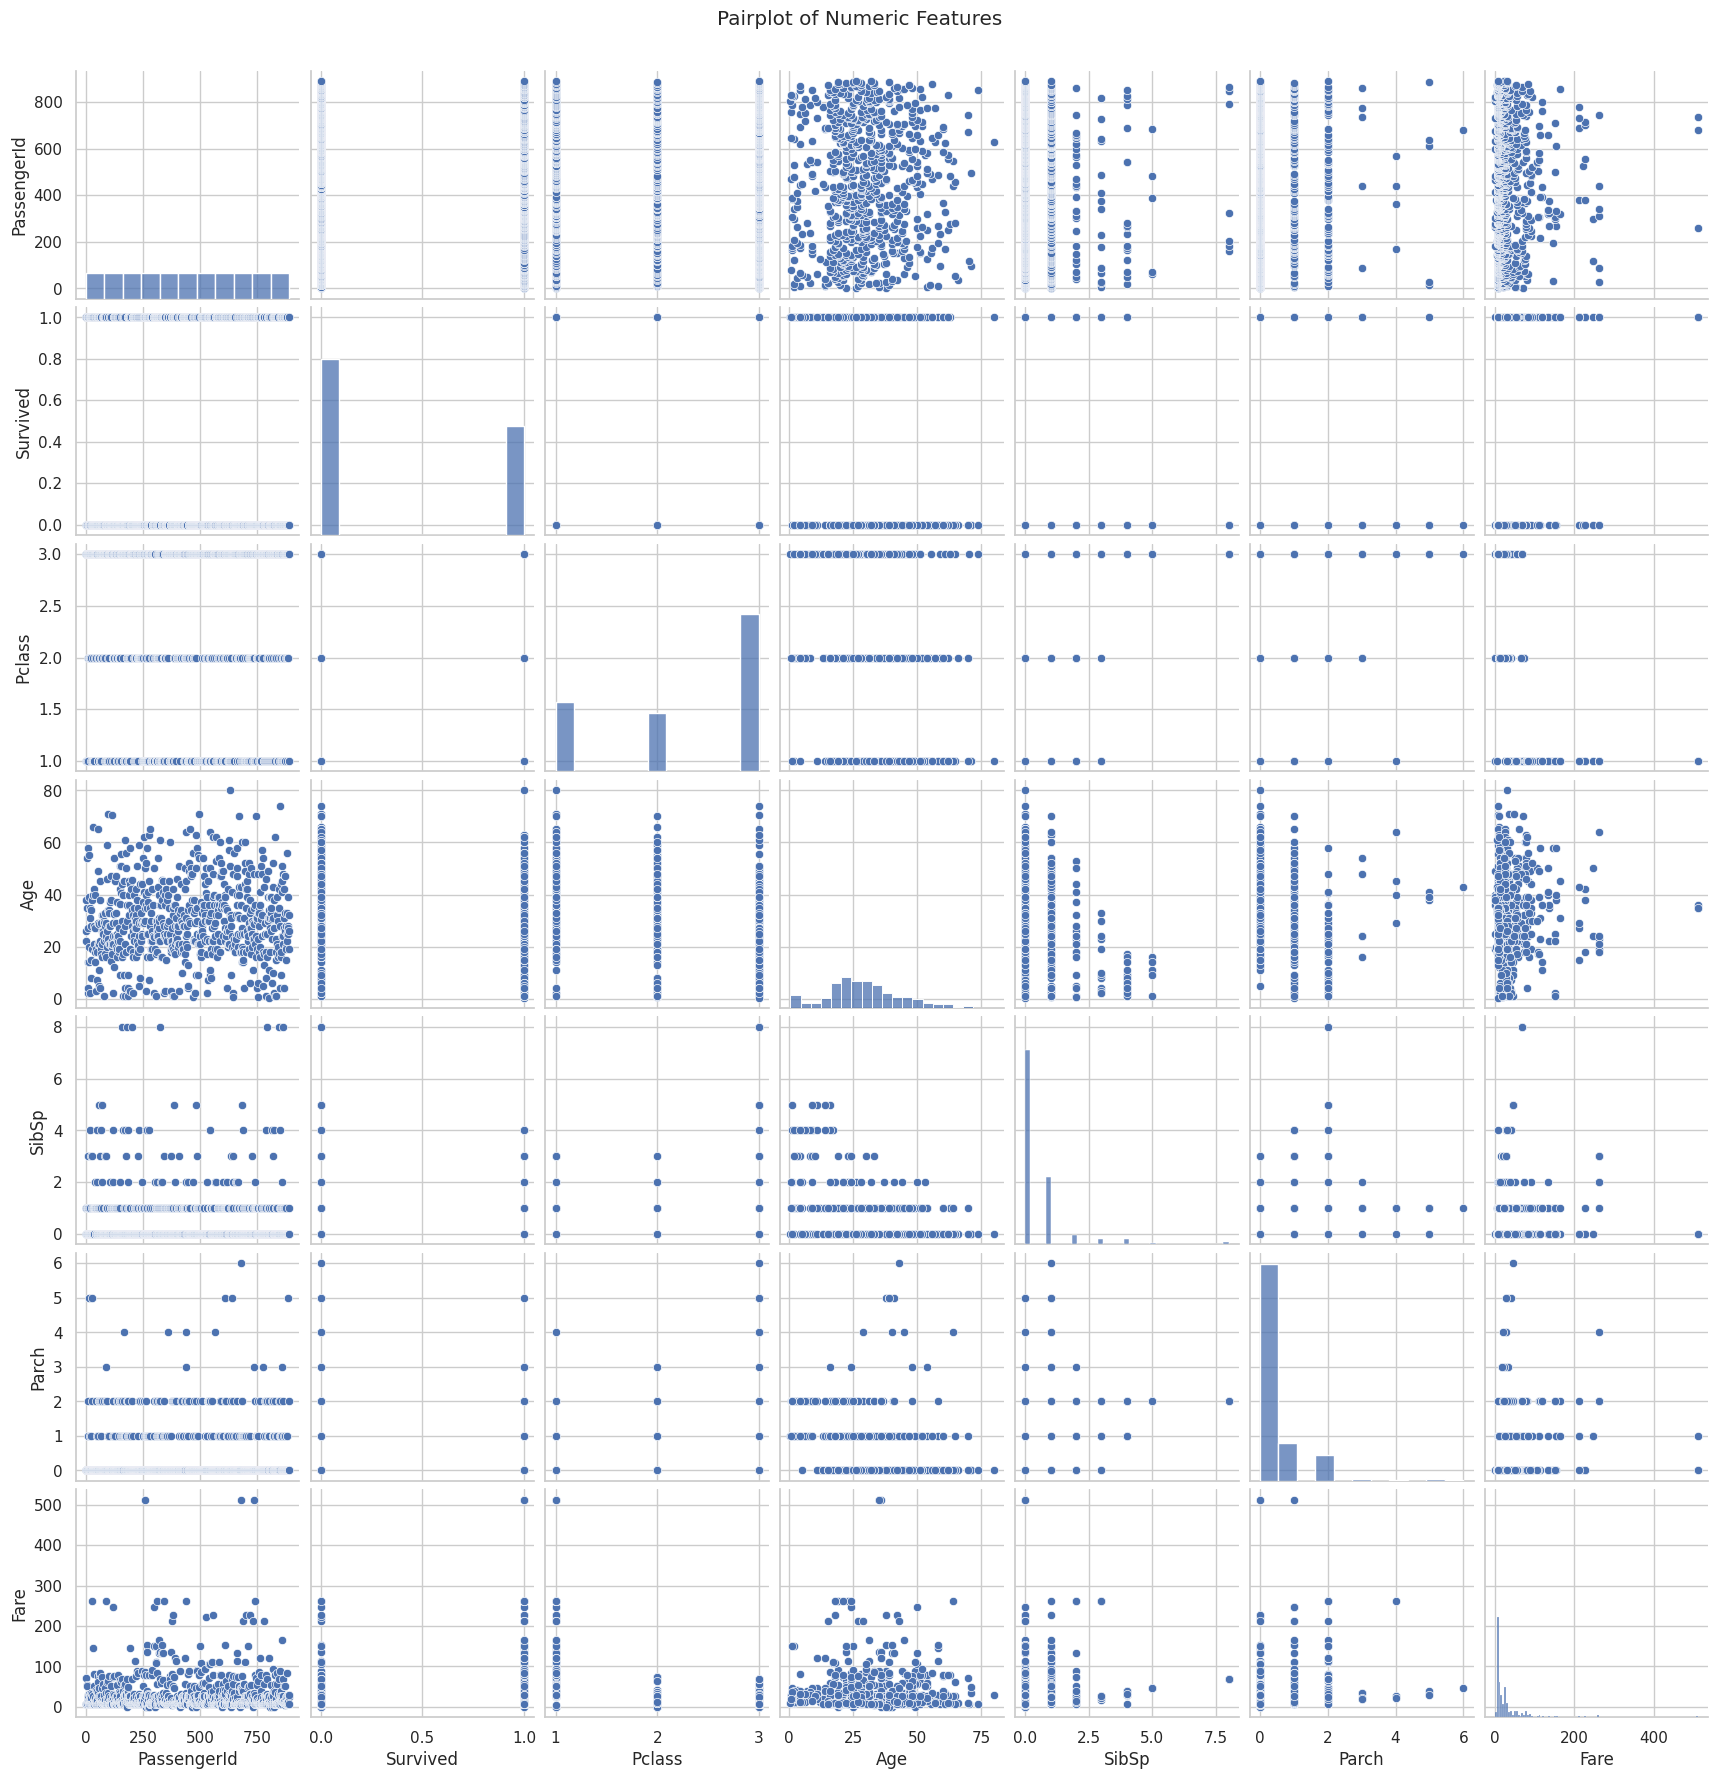

In [49]:
#Pair-plot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

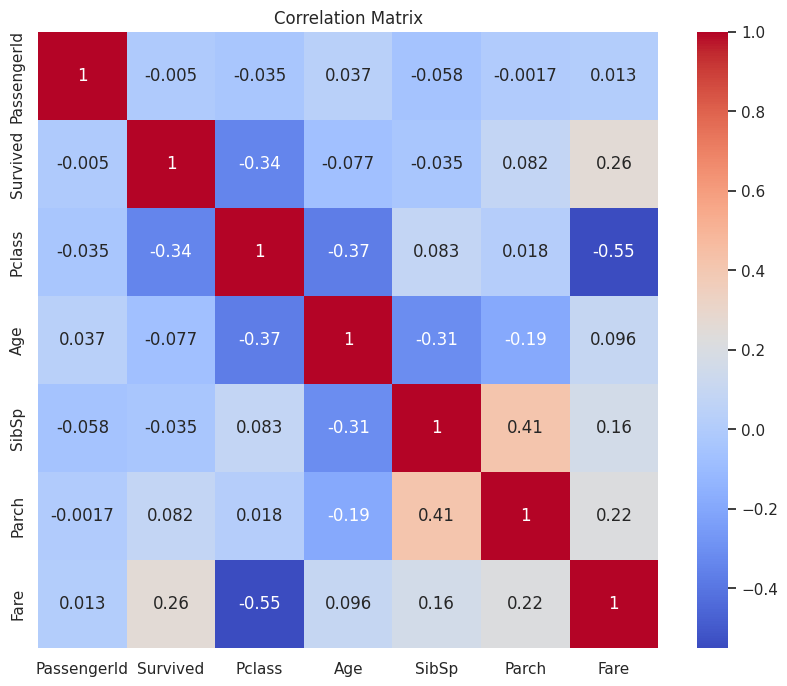

In [50]:
#Correlation-Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Identify patterns, trends, or anomalies in the data.

<Axes: xlabel='Sex', ylabel='Survived'>

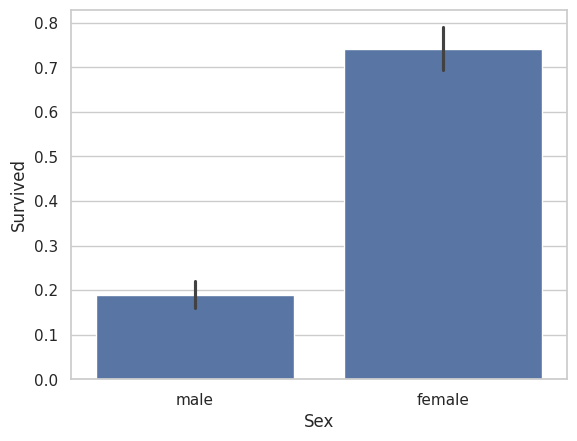

In [51]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

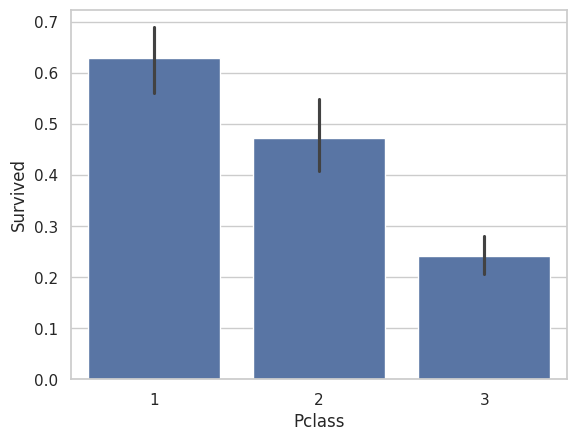

In [52]:
# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

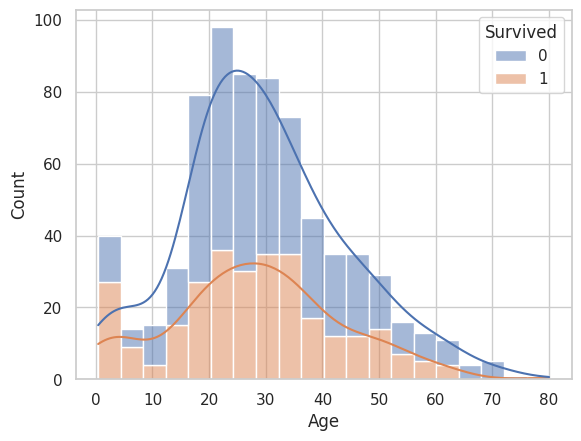

In [53]:
# Age vs Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)

<Axes: xlabel='Fare'>

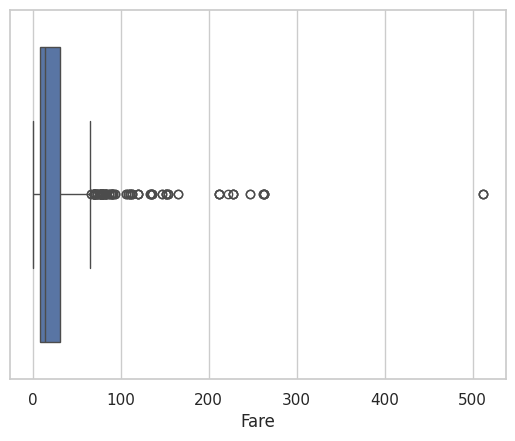

In [54]:
# Fare Distribution (Check for Anomalies)
sns.boxplot(x=df['Fare'])

In [55]:
# Missing Values Pattern
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='SibSp', ylabel='Survived'>

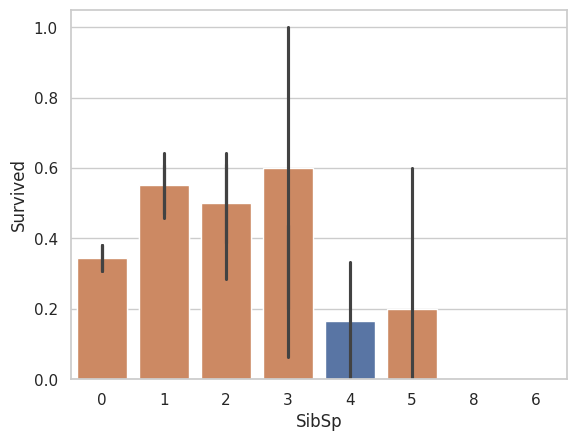

In [56]:
# Siblings/Spouses & Parents/Children vs Survival
sns.barplot(x='SibSp', y='Survived', data=df)
sns.barplot(x='Parch', y='Survived', data=df)

**Data Patterns, Trends, and Anomalies:** Titanic Dataset Analysis
Upon exploring the Titanic dataset, several notable patterns, trends, and anomalies were identified through visual and statistical analysis. A key observation was the significant difference in survival rates between genders—females had a much higher survival rate compared to males, suggesting that women were prioritized during rescue efforts. Similarly, passenger class played a crucial role, with first-class passengers experiencing the highest survival rate, indicating that socio-economic status likely influenced access to lifeboats and safer locations on the ship. Age distribution revealed that younger passengers, particularly children below 10, had higher survival rates, reinforcing the “women and children first” rescue principle.

When examining fare distributions, several extreme outliers were noticed, especially fares exceeding 300, which were paid by some first-class passengers. These high fares are anomalies and point toward very wealthy individuals aboard. Boxplots and histograms highlighted these extremes effectively. Additionally, passengers with small family sizes (1-2 members) had better survival outcomes compared to those traveling alone or with large families, suggesting that manageable group sizes may have supported mutual rescue or coordination.

Furthermore, the dataset revealed missing values, particularly in the Age, Cabin, and Embarked columns. The Cabin column had substantial missing entries, mostly among third-class passengers, potentially reflecting incomplete documentation for lower-class travelers. These patterns and trends not only enhance our understanding of the survival dynamics on the Titanic but also underscore the social and operational factors that influenced passenger outcomes during the disaster.

**Make basic feature-level inferences from visuals.**

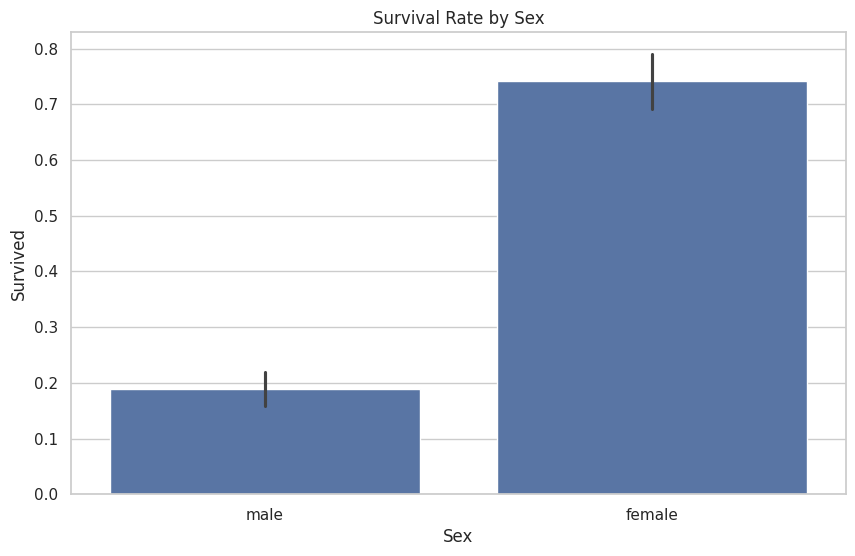

In [57]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Sex vs Survived
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

**Sex vs Survived**

*Visual:* Barplot (Sex vs Survived)

*Inference:* Females had a significantly higher survival rate than males.

Rescue operations likely followed a “women and children first” policy.

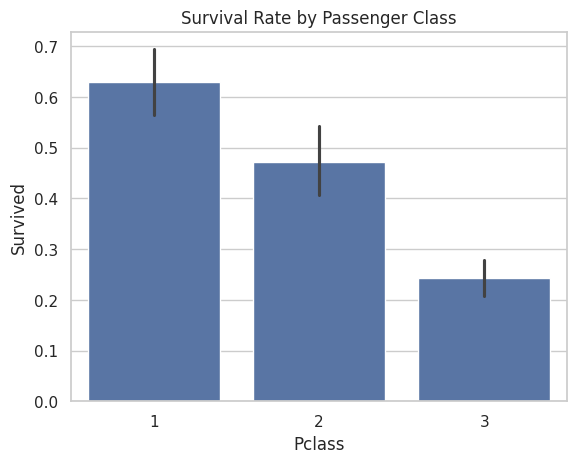

In [58]:
# Pclass vs Survived
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

**Pclass vs Survived**
*Visual:* Barplot (Pclass vs Survived)

*Inference:* First-class passengers had better survival chances. Third-class passengers had the lowest survival rate.

Indicates survival was influenced by socio-economic status.

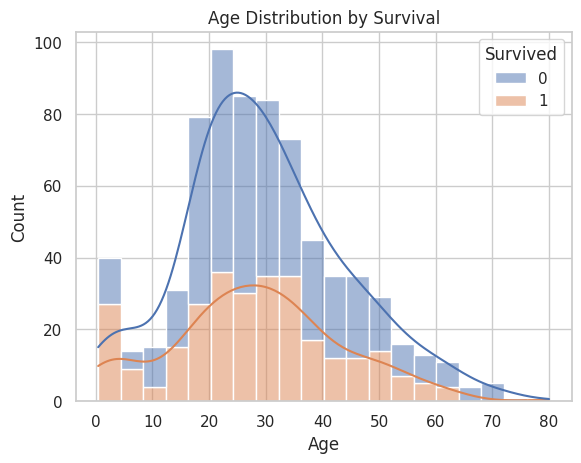

In [64]:
# Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

**Age vs Survived**
*Visual:* Histogram / KDE plot (Age with Survived hue)

*Inference:* Children under 10 years had a noticeably higher survival rate, reflecting the priority given to young passengers. The highest number of deaths occurred among adults aged 20–40, even though they were the most common age group on board. Survival among middle-aged and elderly passengers (40+) was lower and more sparse, with a slight decline as age increased.

This suggests that age was a factor in survival, with young children benefiting most and adults facing harsher odds, likely influenced by class and gender roles during evacuation.

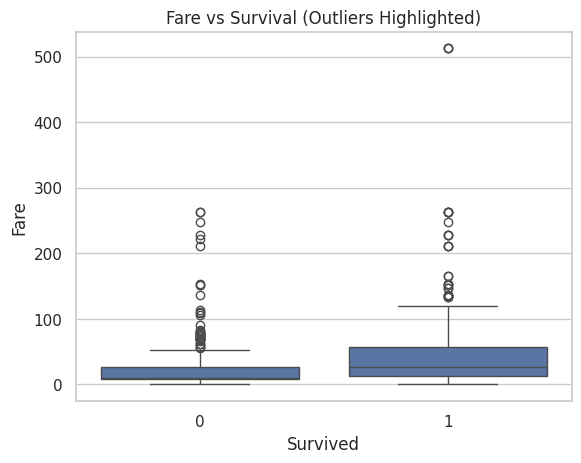

In [60]:
# Fare distribution
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival (Outliers Highlighted)")
plt.show()

**Fare vs Survived**
*Visual:* Boxplot (Fare)

*Inference:* Survivors often paid higher fares—again pointing to class advantage.

Some outliers paid over $500, likely elite first-class passengers.



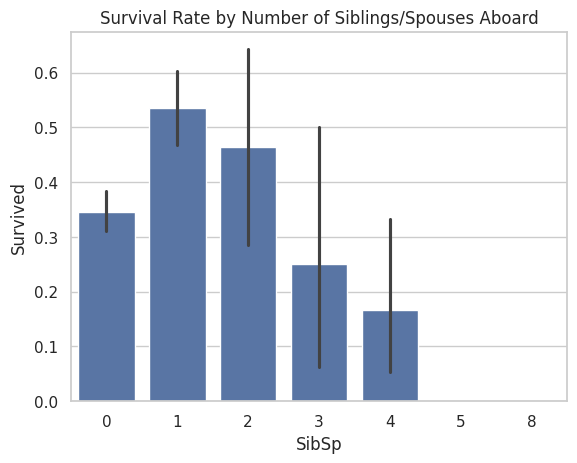

In [37]:
# SibSp (Siblings/Spouses) vs Survived
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title("Survival Rate by Number of Siblings/Spouses Aboard")
plt.show()

**Family Size (SibSp) vs Survived**
*Visual:* Barplot (SibSp vs Survived)

*Inference:* Passengers with 1–2 siblings or spouses aboard had a better survival rate. Those who were alone (SibSp = 0) or had large families (SibSp ≥ 3) were less likely to survive.

This indicates that being with a small family group may have increased the chance of coordinated rescue, while isolation or overcrowding might have hindered survival.

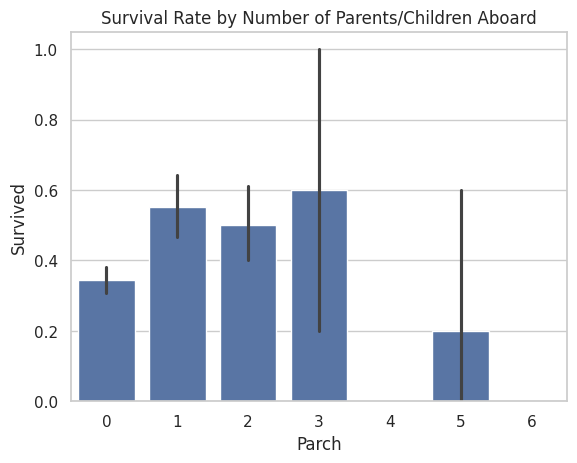

In [61]:
# Parch (Parents/Children) vs Survived
sns.barplot(x='Parch', y='Survived', data=df)
plt.title("Survival Rate by Number of Parents/Children Aboard")
plt.show()

**Parents/Children (Parch) vs Survived**
*Visual: *Barplot (Parch vs Survived)

*Inference:* Passengers with 1–3 parents or children aboard had a higher survival rate. Those with no family (Parch = 0) or larger families (Parch ≥ 3) had lower survival rates.

This suggests that moderate family support may have helped during evacuation, while being alone or in big groups reduced survival chances.

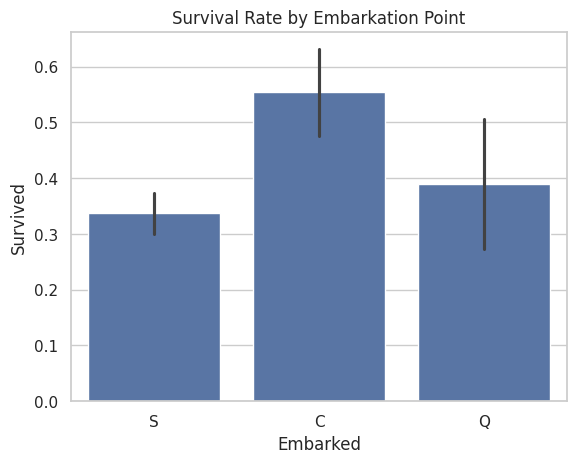

In [62]:
# Embarked vs Survived
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarkation Point")
plt.show()

**Embarked vs Survived**
*Visual:* Barplot (Embarked vs Survived)

*Inference:* Passengers from Cherbourg (C) had higher survival rates. Southampton (S) had the lowest survival rate—possibly due to higher 3rd-class occupancy.